In [2]:
from google.colab.drive import mount
mount("/content/drive/")

Mounted at /content/drive/


# Fast Fourier Transformation Using Numpy

https://pythontic.com/visualization/signals/fouriertransform_fft 
I used this website to come up with the Frequency Domain Signal, I left it unitless in the graph.

In [ ]:
import pandas as pd
import scipy as sp
import scipy.signal as signal
from scipy import constants
import numpy as np
import numpy.fft as nft
import matplotlib.pyplot as plt
import xlrd

['Lactose.375g.20p', 'Lactose.425g.20p', 'Lactose.450g.20p', 'Lactose.500g.20p']


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[0.35222455+0.j]


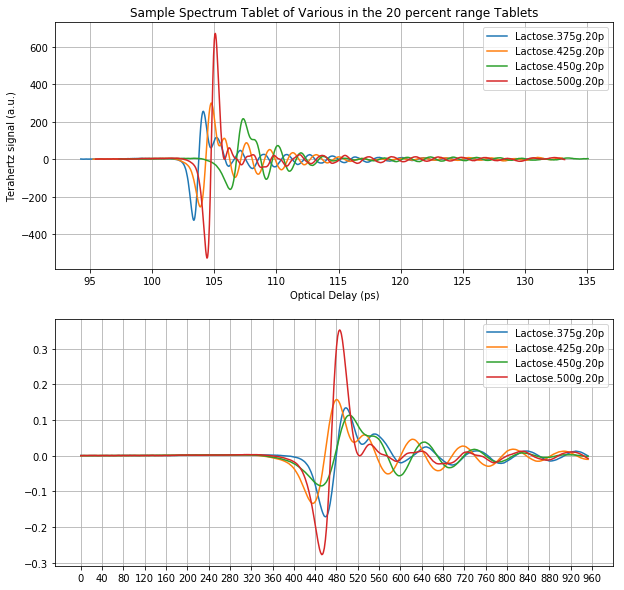

In [ ]:
excel_file = 'C:\\Kean\\MasterFileTDS.xlsx'
wb = xlrd.open_workbook(excel_file)
sh = wb.sheet_names()
percent20 = [item for item in sh if ".20p" in item]
print(percent20)
list_reference = pd.read_excel(excel_file)
N_SamplingFrequency = 1907
N_SamplingInterval = 1/N_SamplingFrequency
begin_time = 92.4321
end_time = 130.198
time = np.arange(begin_time, end_time, N_SamplingInterval) 
fig_20pTDS, [ax,ax2] = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
for i in percent20:
    optical_delay = pd.read_excel(excel_file, sheet_name = [i], usecols = 'A', skiprows = [0,1])
    terahertz_signal = pd.read_excel(excel_file, sheet_name = [i], usecols = 'B', skiprows = [0,1])
    fourierTransform = np.fft.fft(terahertz_signal[i])/len(terahertz_signal[i])           
    fourierTransform = fourierTransform[range(int(len(terahertz_signal[i])/2))]
    tpCount     = len(terahertz_signal[i])
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/N_SamplingFrequency
    frequencies = values/timePeriod
    ax.grid(True)
    #ax.set_xlim(0,3)
    ax.set(xlabel = 'Optical Delay (ps)', ylabel = 'Terahertz signal (a.u.)')
    ax.plot(optical_delay[i],terahertz_signal[i])
    ax.set_title('Sample Spectrum Tablet of Various in the 20 percent range Tablets')
    ax.legend(percent20)
    ax2.grid(True)
    ax2.xaxis.set_ticks(np.arange(0,1000, 40))
    ax2.plot(frequencies, fourierTransform)
    ax2.legend(percent20)
fig_20pTDS.savefig('C:\\Kean\\.20pTDSFDS.png')
#print(signal.find_peaks(fourierTransform))
print(max(fourierTransform))


In [3]:
!jupyter nbconvert "/content/drive/MyDrive/FFT Time Domain Signal, to Frequency Domain.ipynb" --to markdown  --output-dir markdown

[NbConvertApp] Converting notebook /content/drive/MyDrive/FFT Time Domain Signal, to Frequency Domain.ipynb to markdown
[NbConvertApp] Support files will be in FFT Time Domain Signal, to Frequency Domain_files/
[NbConvertApp] Making directory markdown/FFT Time Domain Signal, to Frequency Domain_files
[NbConvertApp] Writing 2714 bytes to markdown/FFT Time Domain Signal, to Frequency Domain.md


In [5]:
!zip -r /content/file.zip /content/markdown

  adding: content/markdown/ (stored 0%)
  adding: content/markdown/FFT Time Domain Signal, to Frequency Domain_files/ (stored 0%)
  adding: content/markdown/FFT Time Domain Signal, to Frequency Domain_files/FFT Time Domain Signal, to Frequency Domain_4_3.png (deflated 3%)
  adding: content/markdown/FFT Time Domain Signal, to Frequency Domain.md (deflated 54%)


In [6]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>